In [2]:
import ROOT as R

Welcome to JupyROOT 6.24/00


In [11]:
import MyLibrary
reload(MyLibrary)
from MyLibrary import Sort_keys
from MyLibrary import GetHist
from MyLibrary import DrawTotalDep
from MyLibrary import DrawEdep

from MyLibrary import processes
from MyLibrary import particles

import MyLibrary as MyLib

MyLib.tfile = R.TFile('/Users/cheng/workspace/Data/musrsim-sms/output_musr_1000_Laser_1p2GeV.root','read')
MyLib.lumi_scale = 6.25e+7/1.e+8

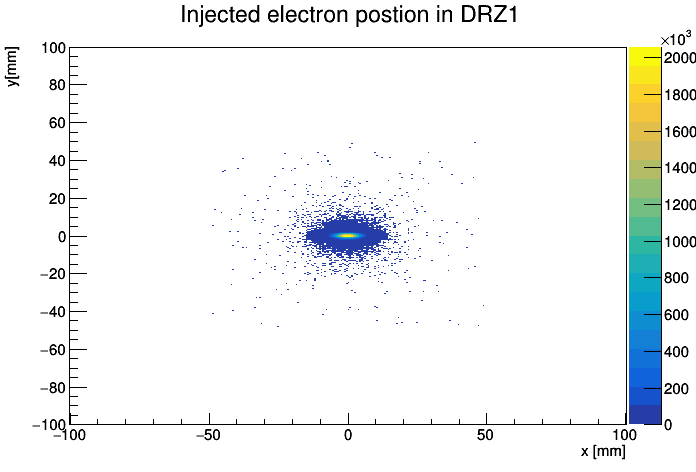

In [25]:
# injected electrons position
c = R.TCanvas()
xy_in = GetHist('DRZ1_e_m_xy')
xy_in.SetStats(0)
xy_in.GetXaxis().SetRangeUser(-100,100)
xy_in.GetYaxis().SetRangeUser(-100,100)
xy_in.SetTitle('Injected electron postion in DRZ1;x [mm];y[mm]')
xy_in.Draw('COLZ')
c.Draw()

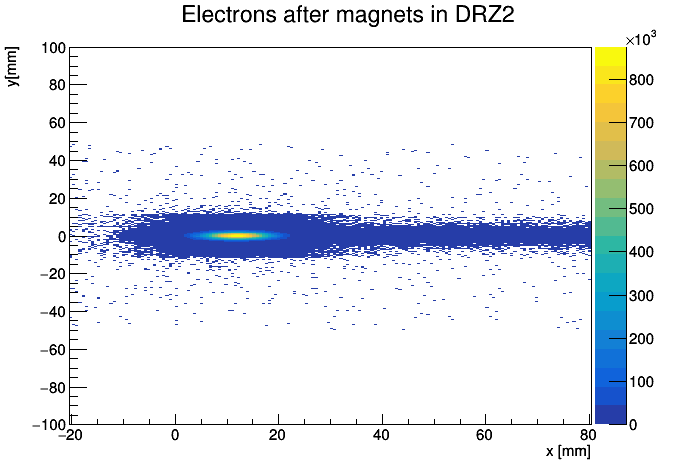

In [26]:
# injected electrons position
c = R.TCanvas()
c.SetRightMargin(0.15)
xy_in = GetHist('DRZ2_e_m_xy')
xy_in.SetStats(0)
xy_in.GetXaxis().SetRangeUser(-20,80)
xy_in.GetYaxis().SetRangeUser(-100,100)
xy_in.SetTitle('Electrons after magnets in DRZ2;x [mm];y[mm]')

xy_in.Draw('COLZ')
c.Draw()

In [27]:
f = lambda x : [a[0] for a in x]
print f(Sort_keys(particles,'Detector_{0:}_time'))
print f(Sort_keys(particles,'Detector_{0:}_time_small'))
print f(Sort_keys(particles,'Detector_{0:}_time_tiny'))

['e_m', 'neutron', 'e_p', 'proton', 'deuteron', 'C12', 'gamma', 'C13', 'pi+', 'pi-', 'alpha', 'mu_p', 'Be8', 'B11', 'mu_m', 'C11', 'triton', 'B10', 'B10', 'Be10', 'Li7', 'Be9', 'Be7', 'Li6', 'B9', 'He3']
['e_m', 'neutron', 'e_p', 'proton', 'C12', 'gamma', 'deuteron', 'C13', 'pi+', 'pi-', 'alpha', 'mu_p', 'Be8', 'B11', 'mu_m', 'C11', 'B10', 'B10', 'Be10', 'Li7', 'Be9', 'triton', 'Be7', 'Li6', 'B9', 'He3']
['e_m', 'e_p', 'proton', 'neutron', 'C12', 'gamma', 'pi+', 'pi-', 'C13', 'alpha', 'mu_p', 'Be8', 'mu_m', 'deuteron', 'B11', 'C11', 'B10', 'B10', 'Li7', 'Be10', 'Be7', 'Be9', 'triton', 'Li6', 'B9', 'He3']


['e_m', 'e_p', 'gamma', 'proton', 'deuteron', 'neutron', 'pi+', 'pi-', 'C12', 'alpha', 'C13', 'mu_p', 'B11', 'mu_m', 'Be8', 'C11', 'B10', 'B10', 'Be10', 'Be9', 'triton', 'Be7', 'Li7', 'Li6', 'He3', 'B9']


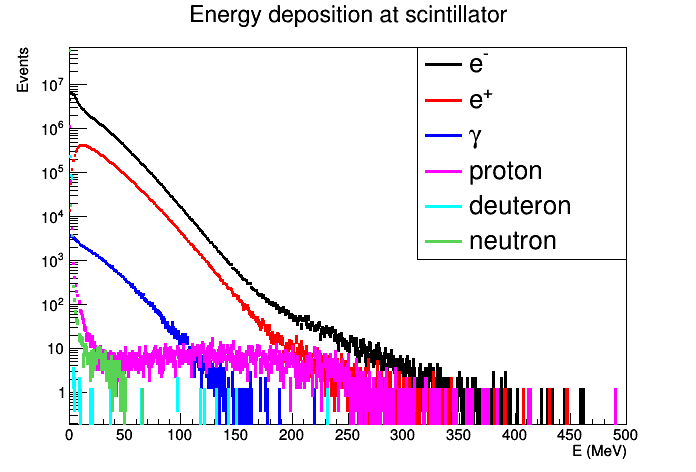

In [28]:
# energy deposition in detector
#draw energy deposition
f = lambda x : [a[0] for a in x]
keys = f(Sort_keys(particles,'Detector_{0:}_edep',lambda x:x.GetMean()*x.Integral()))
print keys
tmp_h = 'Detector_{0:}_edep'
xRange = [0,500]
title = 'Energy deposition at scintillator;E (MeV);Events'
c,_ = DrawEdep(tmp_h,xRange,title,rebin=2,particles=keys[:6])
c.SetLogy()
c.Draw()

['eBrem', 'conv', 'annihil', 'compt', 'initialParticle', 'eIoni', 'phot', 'photonNuclear', 'neutronInelastic', 'electronNuclear', 'nCapture', 'Decay', 'protonInelastic', 'hBertiniCaptureAtRest', 'hIoni', 'GammaToMuPair', 'pi-Inelastic', 'pi+Inelastic', 'muMinusCaptureAtRest', 'muIoni', 'dInelastic', 'lambdaInelastic', 'tInelastic', 'hadElastic']


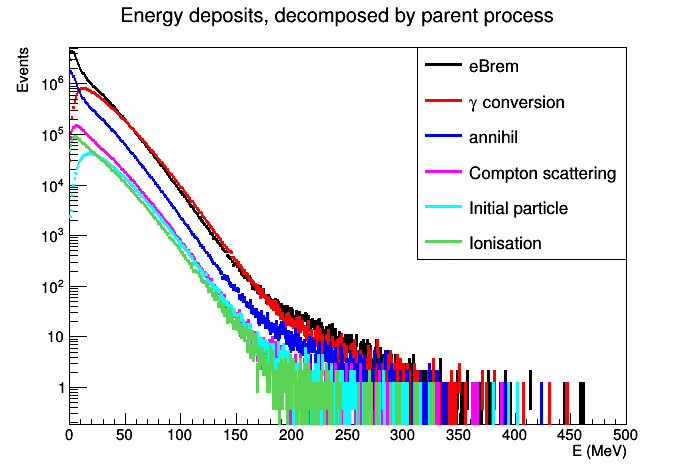

In [31]:
f = lambda x : [a[0] for a in x]
tmp_h = 'Detector_From_{0:}_edep'
keys = f(Sort_keys(processes,tmp_h,lambda x:x.GetMean()*x.Integral()))
print keys


xRange = [0,500]
title = 'Energy deposits, decomposed by parent process;E (MeV);Events'
# particles = ['compt','eIoni','conv','initialParticle','phot']
# name_map = ['Compton scattering','Ionisation','#gamma conversion','Initial particle','photo-electric effect']
c,_ = DrawEdep(tmp_h,xRange,title,rebin=2,particles=keys[:6])
c.SetLogy()
c.Draw()

['compt', 'conv', 'initialParticle', 'eIoni', 'phot', 'eBrem', 'photonNuclear', 'hadElastic', 'nCapture', 'annihil', 'neutronInelastic', 'Decay', 'electronNuclear', 'hIoni', 'GammaToMuPair', 'muMinusCaptureAtRest', 'protonInelastic', 'pi+Inelastic', 'pi-Inelastic', 'muIoni', 'hBertiniCaptureAtRest', 'dInelastic', 'tInelastic', 'lambdaInelastic']


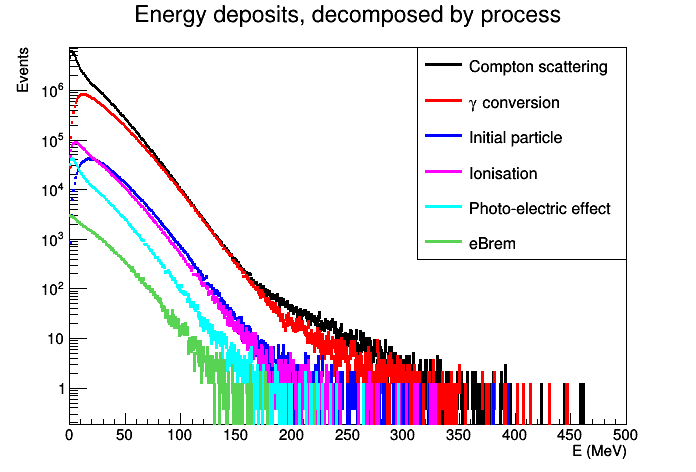

In [32]:
f = lambda x : [a[0] for a in x]
tmp_h = 'Detector_{0:}_edep'
keys = f(Sort_keys(processes,tmp_h,lambda x:x.GetMean()*x.Integral()))
print keys


xRange = [0,500]
title = 'Energy deposits, decomposed by process;E (MeV);Events'
# particles = ['compt','eIoni','conv','initialParticle','phot']
# name_map = ['Compton scattering','Ionisation','#gamma conversion','Initial particle','photo-electric effect']
c,_ = DrawEdep(tmp_h,xRange,title,rebin=2,particles=keys[:6])
c.SetLogy()
c.Draw()

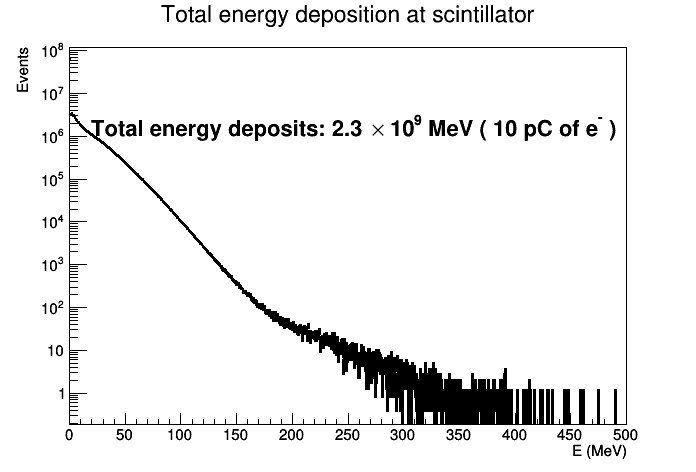

In [33]:
xRange = [0,500]
title = 'Total energy deposition at scintillator;E (MeV);Events'
c,_ = DrawTotalDep(xRange,title,rebin=0.,tex_pos=[20,1e6])
c.Draw()

['e_m', 'neutron', 'e_p', 'proton', 'deuteron', 'C12', 'gamma', 'C13', 'pi+', 'pi-', 'alpha', 'mu_p', 'Be8', 'B11', 'mu_m', 'C11', 'triton', 'B10', 'B10', 'Be10', 'Li7', 'Be9', 'Be7', 'Li6', 'B9', 'He3']
['e_m', 'neutron', 'e_p', 'proton', 'C12', 'gamma', 'deuteron', 'C13', 'pi+', 'pi-', 'alpha', 'mu_p', 'Be8', 'B11', 'mu_m', 'C11', 'B10', 'B10', 'Be10', 'Li7', 'Be9', 'triton', 'Be7', 'Li6', 'B9', 'He3']
['e_m', 'e_p', 'proton', 'neutron', 'C12', 'gamma', 'pi+', 'pi-', 'C13', 'alpha', 'mu_p', 'Be8', 'mu_m', 'deuteron', 'B11', 'C11', 'B10', 'B10', 'Li7', 'Be10', 'Be7', 'Be9', 'triton', 'Li6', 'B9', 'He3']


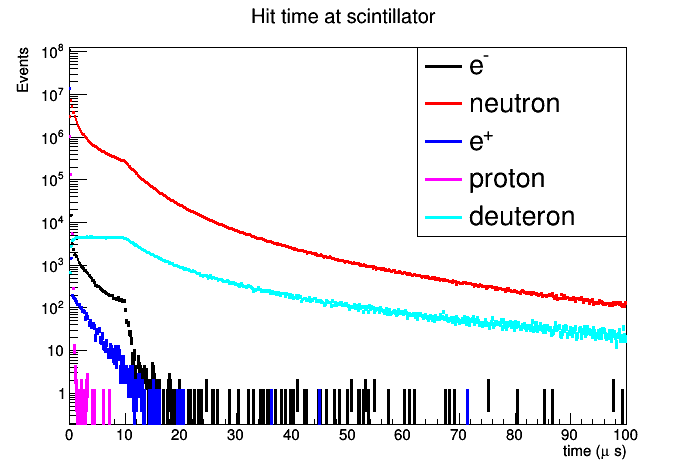

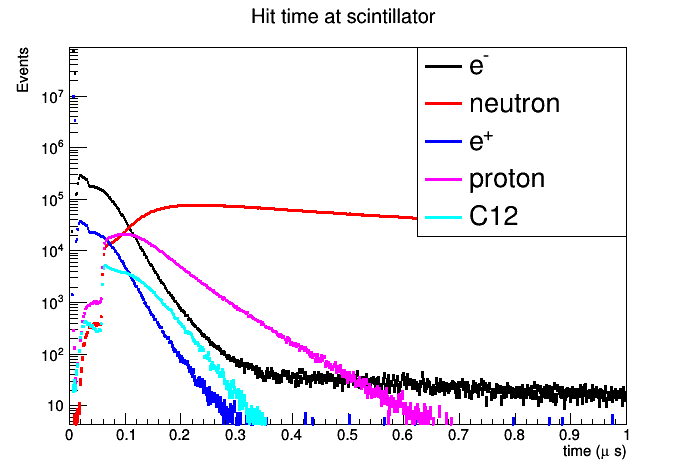

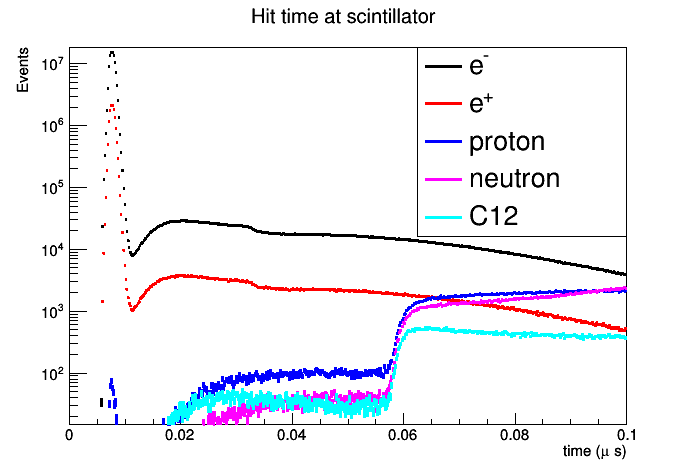

In [34]:
# energy deposition in detector
#draw energy deposition

canvas = []
__ = []
time_array = ['time','time_small','time_tiny']
xRanges = [[0,100],[0,1],[0,0.1]]
for n in range(3):
    tmp_h = 'Detector_{{0:}}_{0:}'.format(time_array[n])
    xRange = xRanges[n]
    title = 'Hit time at scintillator;time (#mu s);Events'
    f = lambda x : [a[0] for a in x]
    keys = f(Sort_keys(particles,tmp_h,R.TH1F.Integral))
    print keys    
    c,_ = DrawEdep(tmp_h,xRange,title,rebin=2,particles=keys[:5],legPos=[0.6,0.5,0.9,0.9])
    c.SetLogy()
    c.Draw()
    canvas.append(c)
    __.append(_)

['compt', 'photonNuclear', 'conv', 'neutronInelastic', 'eIoni', 'initialParticle', 'hadElastic', 'phot', 'nCapture', 'electronNuclear', 'protonInelastic', 'hBertiniCaptureAtRest', 'eBrem', 'pi-Inelastic', 'pi+Inelastic', 'annihil', 'muMinusCaptureAtRest', 'Decay', 'dInelastic', 'hIoni', 'GammaToMuPair', 'tInelastic', 'muIoni', 'lambdaInelastic']
['compt', 'conv', 'photonNuclear', 'neutronInelastic', 'eIoni', 'initialParticle', 'hadElastic', 'phot', 'eBrem', 'electronNuclear', 'hBertiniCaptureAtRest', 'protonInelastic', 'nCapture', 'pi-Inelastic', 'annihil', 'pi+Inelastic', 'muMinusCaptureAtRest', 'Decay', 'dInelastic', 'hIoni', 'GammaToMuPair', 'muIoni', 'tInelastic', 'lambdaInelastic']
['compt', 'conv', 'eIoni', 'initialParticle', 'phot', 'hadElastic', 'photonNuclear', 'neutronInelastic', 'eBrem', 'annihil', 'electronNuclear', 'Decay', 'GammaToMuPair', 'hIoni', 'protonInelastic', 'muIoni', 'pi-Inelastic', 'hBertiniCaptureAtRest', 'pi+Inelastic', 'muMinusCaptureAtRest', 'nCapture']


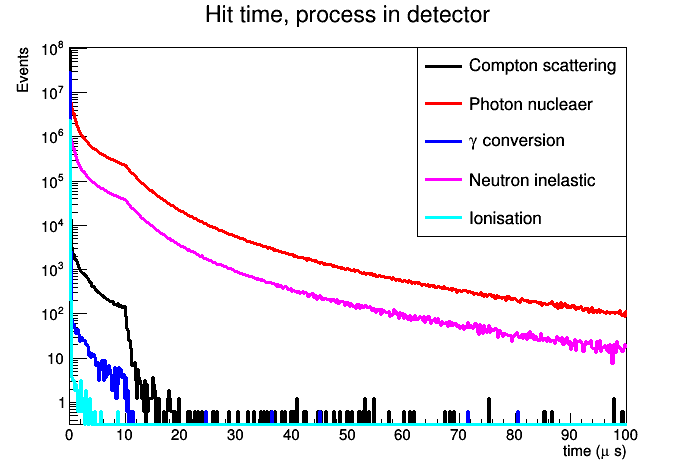

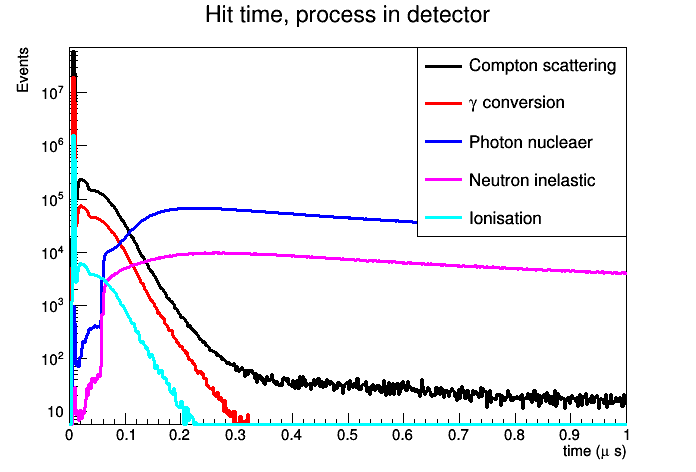

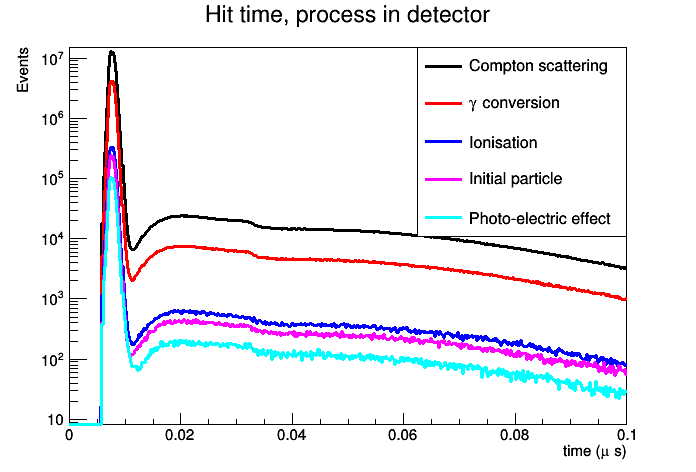

In [5]:
# energy deposition in detector
#draw energy deposition

canvas = []
__ = []
time_array = ['time','time_small','time_tiny']
xRanges = [[0,100],[0,1],[0,0.1]]
for n in range(3):
    tmp_h = 'Detector_{{0:}}_{0:}'.format(time_array[n])
    xRange = xRanges[n]
    title = 'Hit time, process in detector;time (#mu s);Events'
    f = lambda x : [a[0] for a in x]
    keys = f(Sort_keys(processes,tmp_h,R.TH1F.Integral))
    print keys    
    c,_ = DrawEdep(tmp_h,xRange,title,rebin=2,particles=keys[:5],legPos=[0.6,0.5,0.9,0.9])
    c.SetLogy()
    c.Draw()
    canvas.append(c)
    __.append(_)

['eBrem', 'photonNuclear', 'conv', 'annihil', 'neutronInelastic', 'compt', 'eIoni', 'initialParticle', 'phot', 'electronNuclear', 'protonInelastic', 'hBertiniCaptureAtRest', 'pi-Inelastic', 'pi+Inelastic', 'nCapture', 'muMinusCaptureAtRest', 'dInelastic', 'Decay', 'GammaToMuPair', 'hIoni', 'tInelastic', 'muIoni', 'lambdaInelastic', 'hadElastic']
['eBrem', 'conv', 'annihil', 'photonNuclear', 'compt', 'neutronInelastic', 'eIoni', 'initialParticle', 'phot', 'electronNuclear', 'protonInelastic', 'hBertiniCaptureAtRest', 'nCapture', 'pi-Inelastic', 'pi+Inelastic', 'muMinusCaptureAtRest', 'Decay', 'dInelastic', 'GammaToMuPair', 'hIoni', 'muIoni', 'tInelastic', 'lambdaInelastic', 'hadElastic']
['eBrem', 'conv', 'annihil', 'compt', 'eIoni', 'initialParticle', 'phot', 'photonNuclear', 'neutronInelastic', 'electronNuclear', 'nCapture', 'hBertiniCaptureAtRest', 'protonInelastic', 'pi-Inelastic', 'Decay', 'muMinusCaptureAtRest', 'pi+Inelastic', 'GammaToMuPair', 'hIoni', 'muIoni', 'dInelastic', 'ha

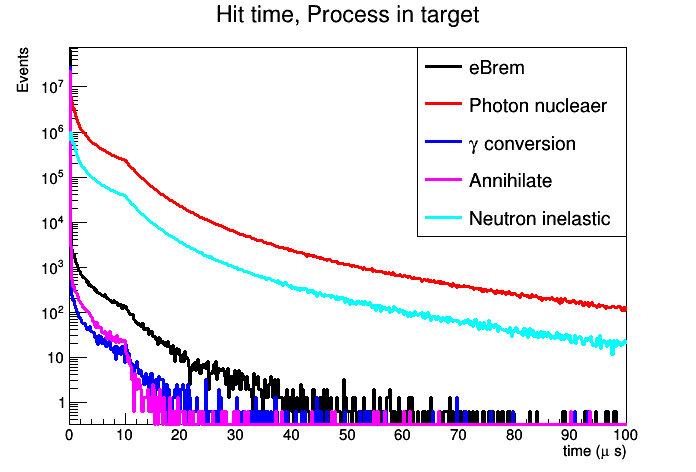

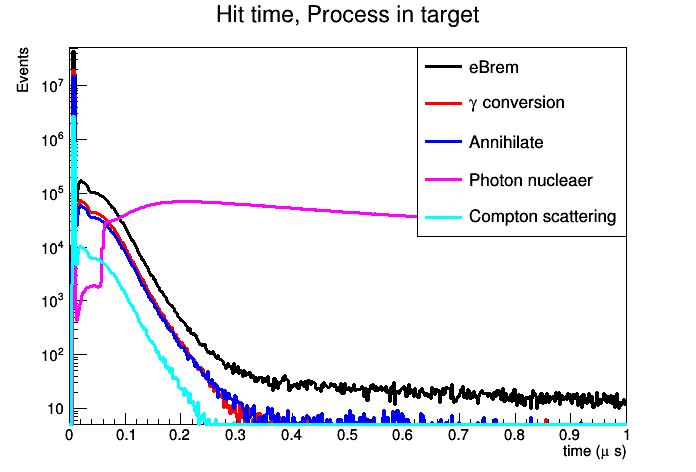

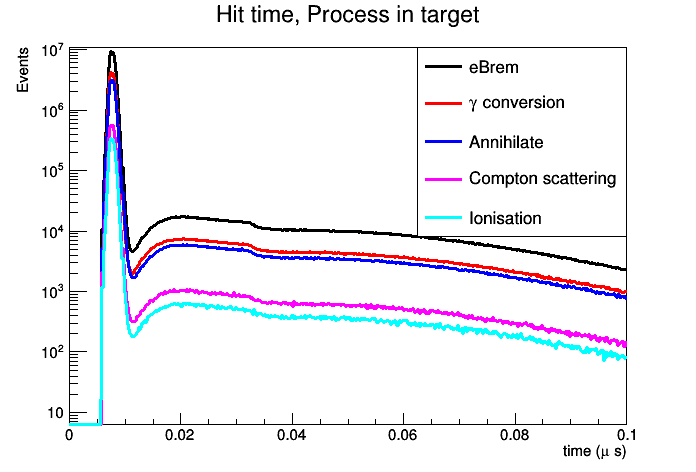

In [4]:
# energy deposition in detector
#draw energy deposition

canvas = []
__ = []
time_array = ['time','time_small','time_tiny']
xRanges = [[0,100],[0,1],[0,0.1]]
for n in range(3):
    tmp_h = 'Detector_From_{{0:}}_{0:}'.format(time_array[n])
    xRange = xRanges[n]
    title = 'Hit time, Process in target;time (#mu s);Events'
    f = lambda x : [a[0] for a in x]
    keys = f(Sort_keys(processes,tmp_h,R.TH1F.Integral))
    print keys    
    c,_ = DrawEdep(tmp_h,xRange,title,rebin=2,particles=keys[:5],legPos=[0.6,0.5,0.9,0.9])
    c.SetLogy()
    c.Draw()
    canvas.append(c)
    __.append(_)

['eBrem', 'annihil', 'conv', 'compt', 'eIoni', 'initialParticle', 'phot', 'photonNuclear', 'nCapture', 'neutronInelastic', 'electronNuclear', 'hBertiniCaptureAtRest', 'protonInelastic', 'Decay', 'pi-Inelastic', 'hIoni', 'pi+Inelastic', 'GammaToMuPair', 'muIoni', 'muMinusCaptureAtRest', 'dInelastic', 'tInelastic']
['eBrem', 'annihil', 'conv', 'compt', 'eIoni', 'initialParticle', 'phot', 'photonNuclear', 'neutronInelastic', 'nCapture', 'electronNuclear', 'hBertiniCaptureAtRest', 'protonInelastic', 'pi-Inelastic', 'Decay', 'hIoni', 'pi+Inelastic', 'muIoni', 'muMinusCaptureAtRest', 'GammaToMuPair', 'dInelastic', 'tInelastic']
['eBrem', 'annihil', 'conv', 'compt', 'eIoni', 'initialParticle', 'phot', 'photonNuclear', 'neutronInelastic', 'electronNuclear', 'nCapture', 'hBertiniCaptureAtRest', 'protonInelastic', 'hIoni', 'Decay', 'pi-Inelastic', 'pi+Inelastic', 'muIoni', 'muMinusCaptureAtRest', 'dInelastic', 'GammaToMuPair', 'tInelastic']


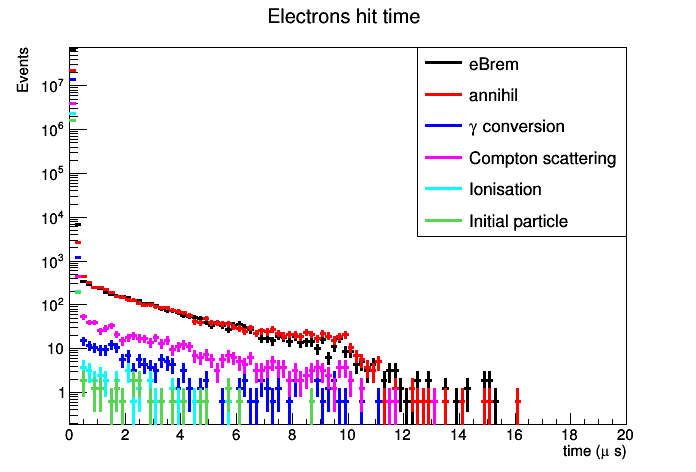

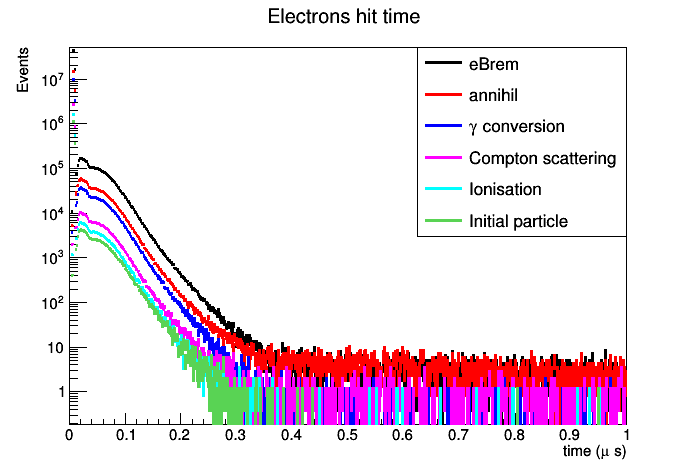

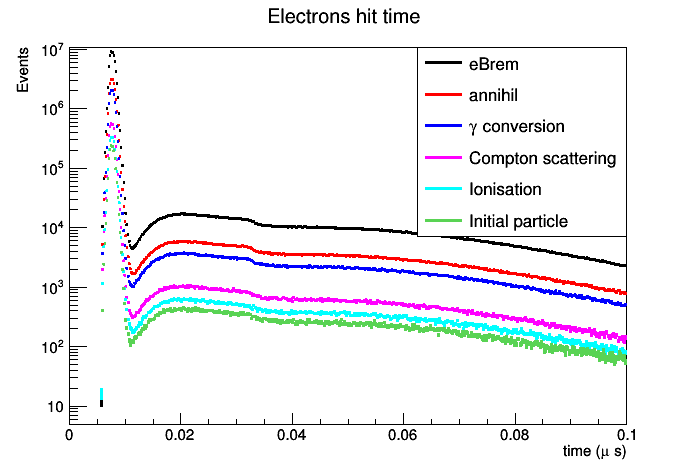

In [40]:
# energy deposition in detector
#draw energy deposition

canvas = []
__ = []
time_array = ['time','time_small','time_tiny']
xRanges = [[0,20],[0,1],[0,0.1]]
for n in range(3):
    tmp_h = 'Detector_From_{{0:}}_e_m_{0:}'.format(time_array[n])
    xRange = xRanges[n]
    title = 'Electrons hit time;time (#mu s);Events'
    
    f = lambda x : [a[0] for a in x]
    keys = f(Sort_keys(processes,tmp_h,R.TH1F.Integral))
    print keys
    c,_ = DrawEdep(tmp_h,xRange,title,rebin=2,particles=keys[:6],legPos=[0.6,0.5,0.9,0.9])
    c.SetLogy()
    c.Draw()
    canvas.append(c)
    __.append(_)

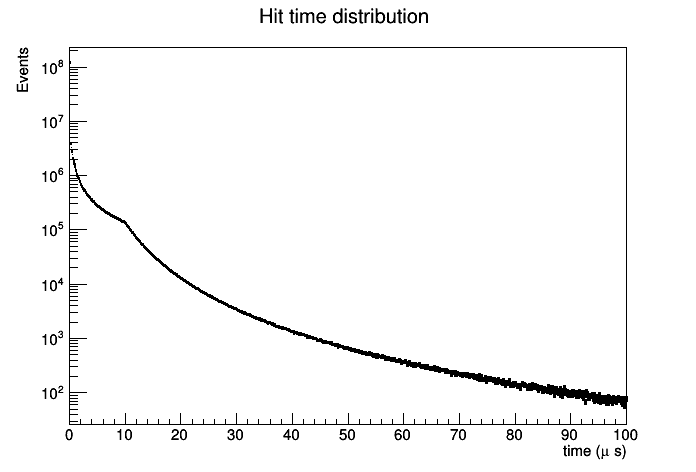

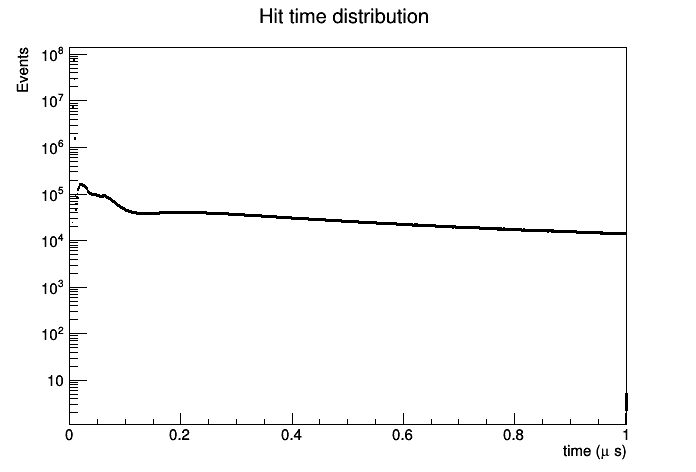

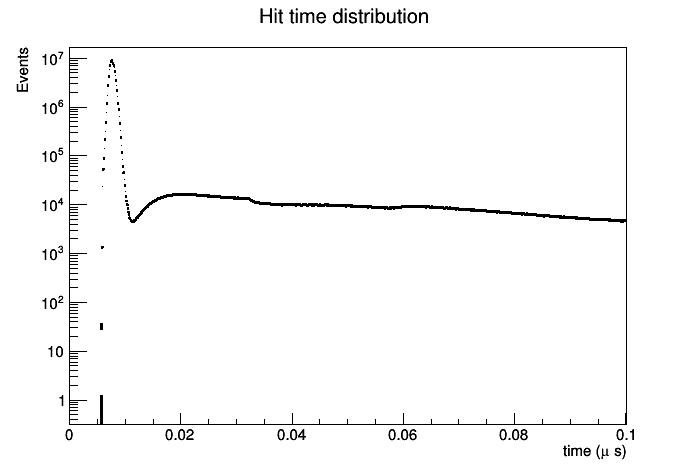

In [41]:
xRange = [0,100]
title = 'Hit time distribution;time (#mu s);Events'
canvas = []
__ = []
time_array = ['time','time_small','time_tiny']
xRanges = [[0,100],[0,1],[0,0.1]]
for n in range(3):
    c,_ = DrawTotalDep(xRange,title,rebin=0,hist_name='Detector_{0:}'.format(time_array[n]),draw_tex=False)
    canvas.append(c);__.append(_)
    c.Draw()


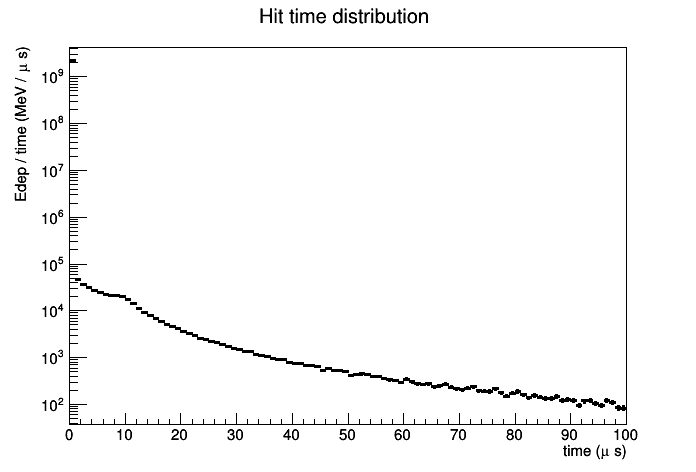

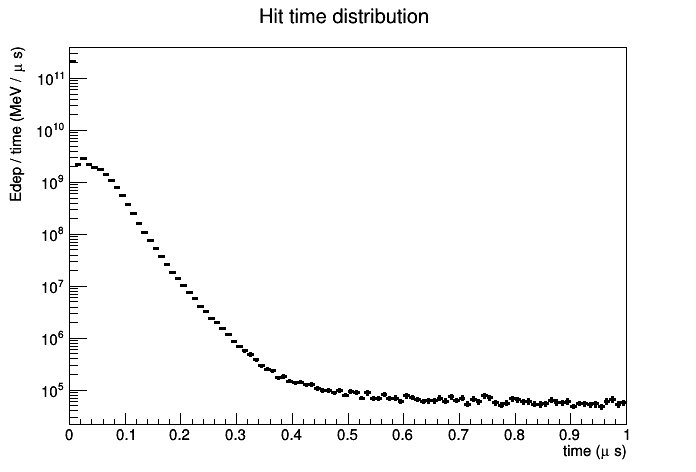

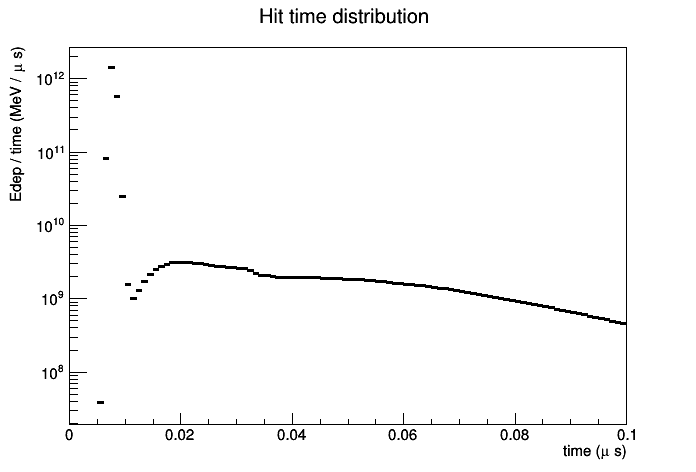

In [64]:
def wrapper(rangex):
    def cmp(hist):
        if rangex[1]<10:
            return hist.Integral()
        else:
            integral = hist.Integral(hist.GetXaxis().FindBin(30),hist.GetXaxis().FindBin(80))
            return integral
    return cmp                

xRange = [0,100]
title = 'Hit time distribution;time (#mu s);Edep / time (MeV / #mu s)'
canvas = []
__ = []
time_array = ['time_edep','time_small_edep','time_tiny_edep']
xRanges = [[0,100],[0,1],[0,0.1]]
for n in range(3):
    c,_ = DrawTotalDep(xRanges[n],title,rebin=10,hist_name='Detector_{0:}'.format(time_array[n]),draw_tex=False,scale_by_binW=True)
    canvas.append(c);__.append(_)
    c.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


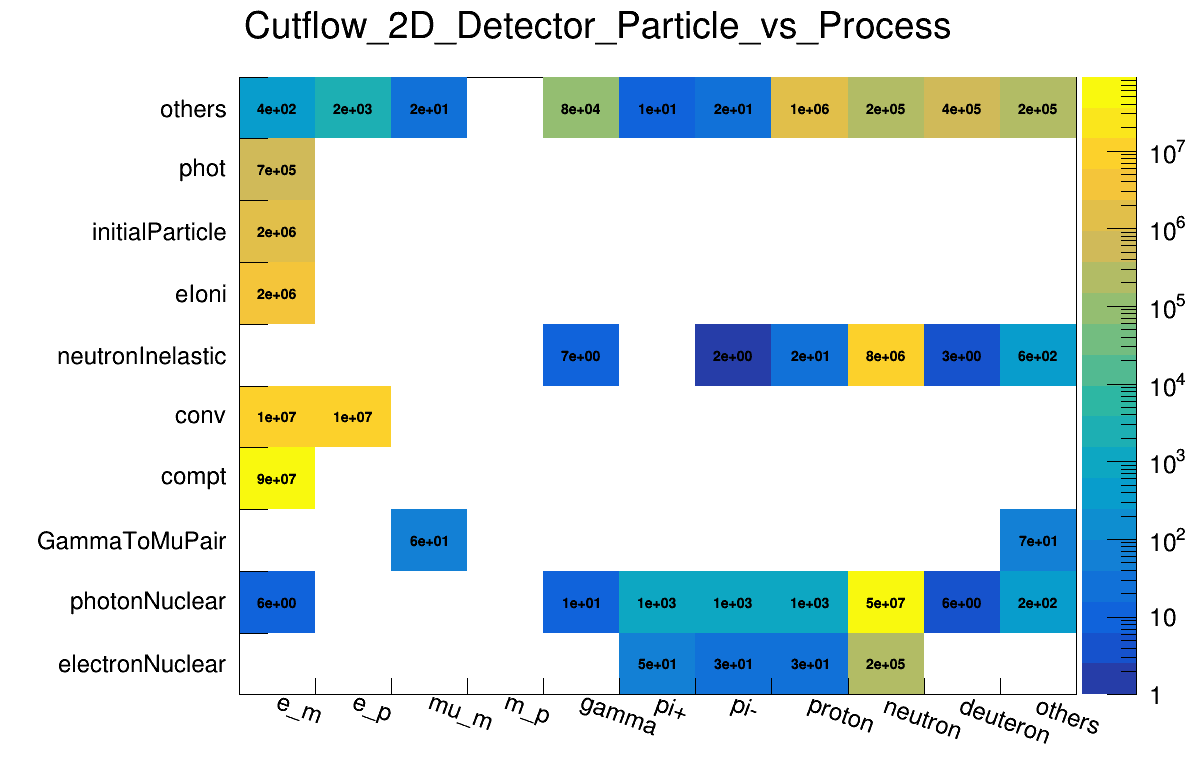

In [65]:
R.gStyle.SetPaintTextFormat('.e')
c = R.TCanvas('c1','c1',1200,800)
c.SetLeftMargin(0.2)
h = GetHist('Cutflow_2D_Detector_Particle_vs_Process')
h.SetStats(0)
h.SetLabelSize(0.05)
h.GetYaxis().SetLabelSize(0.05)
h.Draw('text COLZ')
h.SetTitle
c.SetLogz(1)
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


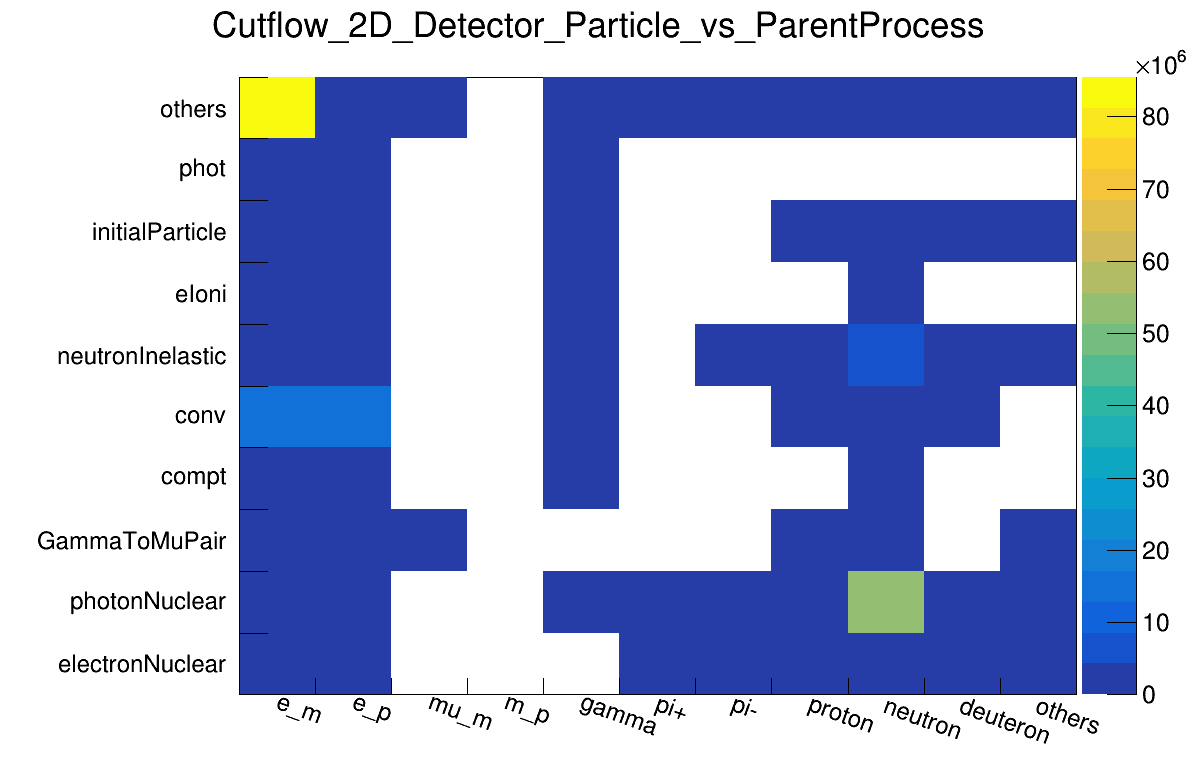

In [44]:
c = R.TCanvas('c2','c2',1200,800)
c.SetLeftMargin(0.2)
h = GetHist('Cutflow_2D_Detector_Particle_vs_ParentProcess')
h.SetStats(0)
h.SetLabelSize(0.05)
h.GetYaxis().SetLabelSize(0.05)
h.Draw('COLZ')
h.SetTitle

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


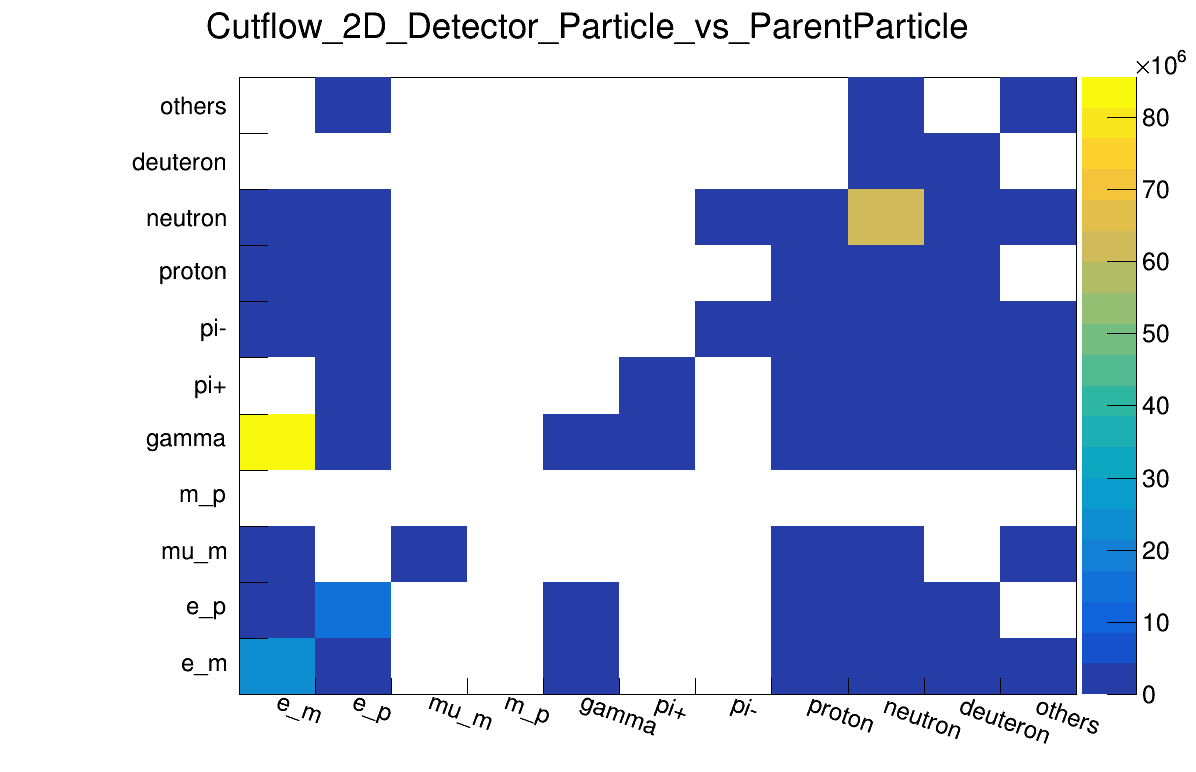

In [45]:
c = R.TCanvas('c3','c3',1200,800)
c.SetLeftMargin(0.2)
h = GetHist('Cutflow_2D_Detector_Particle_vs_ParentParticle')
h.SetStats(0)
h.SetLabelSize(0.05)
h.GetYaxis().SetLabelSize(0.05)
h.Draw('COLZ')
h.SetTitle

c.Draw()

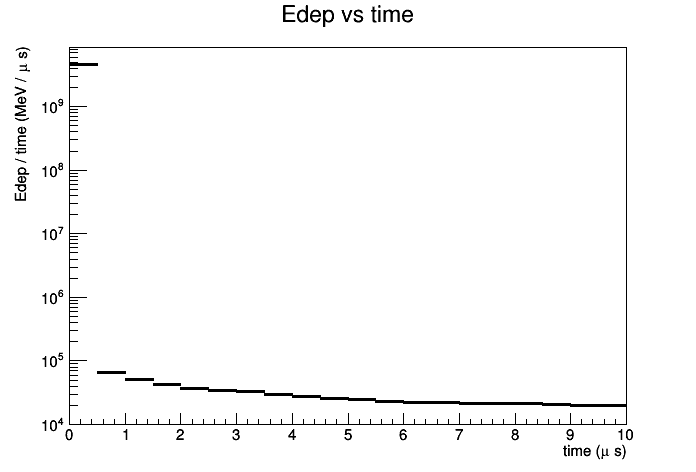

In [26]:

title = 'Edep vs time;time (#mu s);Edep / time (MeV / #mu s)'
canvas = []
__ = []
time_array = ['time_edep','time_small_edep','time_tiny_edep']
xRanges = [[0,10],[0,1],[0,0.1]]
for n in range(1):
    c,_ = DrawTotalDep(xRanges[n],title,rebin=5,hist_name='Detector_{0:}'.format(time_array[n]),draw_tex=False,scale_by_binW=True)
    canvas.append(c);__.append(_)
    c.Draw()


['e_m', 'e_p', 'gamma', 'proton', 'deuteron', 'neutron', 'pi+', 'pi-', 'C12', 'alpha', 'C13', 'mu_p', 'B11', 'mu_m', 'Be8', 'C11', 'B10', 'B10', 'Be10', 'Be9', 'triton', 'Be7', 'Li7', 'Li6', 'He3', 'B9']


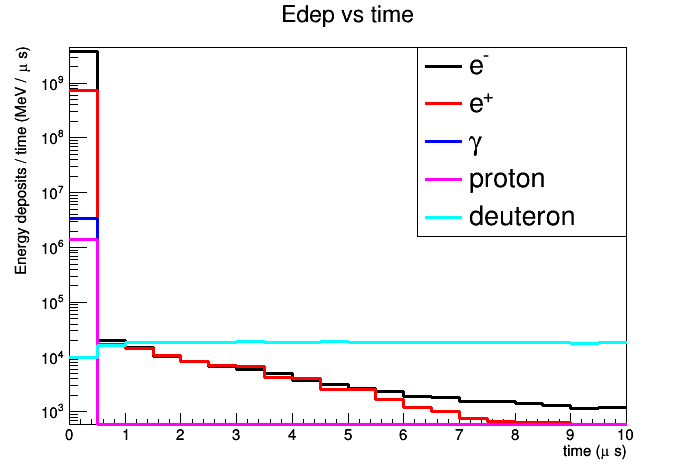

In [27]:
# energy deposition in detector
#draw energy deposition

canvas = []
__ = []
time_array = ['time_edep','time_small_edep','time_tiny_edep']
xRanges = [[0,10],[0,1],[0,0.1]]
for n in range(1):
    tmp_h = 'Detector_{{0:}}_{0:}'.format(time_array[n])
    xRange = xRanges[n]
    title = 'Edep vs time;time (#mu s);Energy deposits / time (MeV / #mu s)'
    f = lambda x : [a[0] for a in x]
    keys = f(Sort_keys(particles,tmp_h,R.TH1F.Integral))
    print keys    
    c,_ = DrawEdep(tmp_h,xRange,title,rebin=5,particles=keys[:5],legPos=[0.6,0.5,0.9,0.9], scale_by_binW=True)
    c.SetLogy()
    c.Draw()
    canvas.append(c)
    __.append(_)

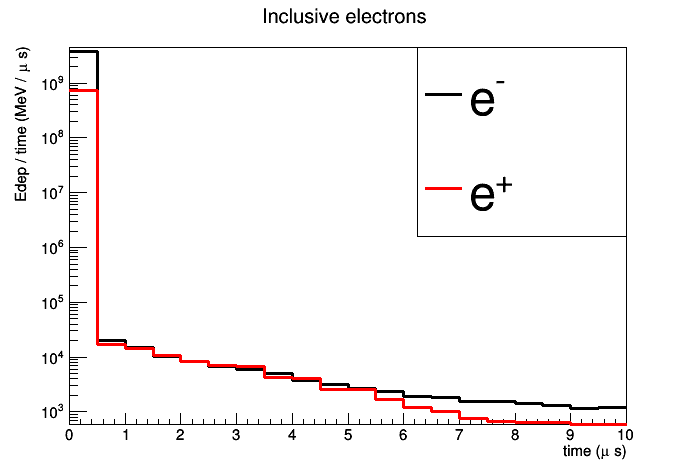

In [32]:
title = 'Inclusive electrons;time (#mu s);Edep / time (MeV / #mu s)'
canvas = []
__ = []
xRange = [0,10]
tmp_h = 'Detector_{0:}_time_edep'
keys = ['e_m','e_p']
c,_ = DrawEdep(tmp_h,xRange,title,rebin=5,particles=keys,legPos=[0.6,0.5,0.9,0.9],scale_by_binW=True)
c.SetLogy(1)
canvas.append(c);__.append(_)
c.Draw()

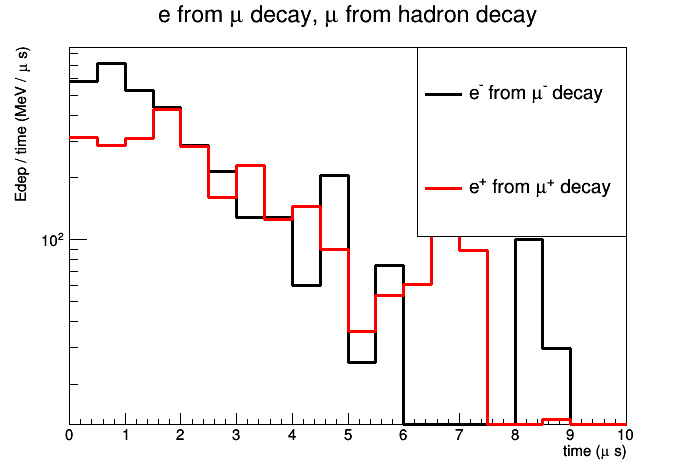

In [30]:
title = 'e from #mu decay, #mu from hadron decay;time (#mu s);Edep / time (MeV / #mu s)'
canvas = []
__ = []
xRange = [0,10]
tmp_h = 'Detector_From_Decay_{0:}_time_edep'
keys = ['e_m_From_mu_m','e_p_From_mu_p']
c,_ = DrawEdep(tmp_h,xRange,title,rebin=5,particles=keys,legPos=[0.6,0.5,0.9,0.9],scale_by_binW=True)
c.SetLogy(1)
canvas.append(c);__.append(_)
c.Draw()